In [2]:
import numpy as np
import torch
import math
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from env import Game
from train import TrainAgent
from pg_model import PolicyNet
from torch import optim
import os
%load_ext autoreload
%autoreload 2

dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = PolicyNet()
model = model.to(dev)
opt = optim.AdamW(model.parameters())
agent = TrainAgent(model, opt)
losses = []
print("imi")    
losses += agent.train(200, imitation=True)
# print("pg")
# losses += agent.train(1000, imitation=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
imi


  0%|          | 1/200 [00:01<04:14,  1.28s/it]

594.2


  6%|▌         | 11/200 [00:12<04:03,  1.29s/it]

636.25


 10%|█         | 21/200 [00:23<03:47,  1.27s/it]

777.05


 16%|█▌        | 31/200 [00:36<03:41,  1.31s/it]

876.1


 20%|██        | 41/200 [00:49<03:47,  1.43s/it]

763.55


 26%|██▌       | 51/200 [01:02<03:46,  1.52s/it]

933.0


 30%|███       | 61/200 [01:15<03:16,  1.41s/it]

994.3


 36%|███▌      | 71/200 [01:28<03:06,  1.44s/it]

795.6


 40%|████      | 81/200 [01:42<03:01,  1.52s/it]

965.2


 46%|████▌     | 91/200 [01:55<02:50,  1.56s/it]

1040.4


 50%|█████     | 101/200 [02:09<02:32,  1.54s/it]

762.0


 56%|█████▌    | 111/200 [02:22<02:09,  1.46s/it]

1086.75


 60%|██████    | 121/200 [02:36<01:58,  1.50s/it]

863.45


 66%|██████▌   | 131/200 [02:50<01:48,  1.57s/it]

1104.25


 70%|███████   | 141/200 [03:04<01:31,  1.56s/it]

1009.2


 76%|███████▌  | 151/200 [03:18<01:12,  1.48s/it]

767.35


 80%|████████  | 161/200 [03:31<01:00,  1.56s/it]

861.45


 86%|████████▌ | 171/200 [03:45<00:44,  1.53s/it]

913.85


 90%|█████████ | 181/200 [03:59<00:30,  1.59s/it]

948.7


 96%|█████████▌| 191/200 [04:13<00:14,  1.56s/it]

953.4


100%|██████████| 200/200 [04:25<00:00,  1.33s/it]


In [33]:
print("pg")
losses += agent.train(1, imitation=False)

pg


100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

16.25


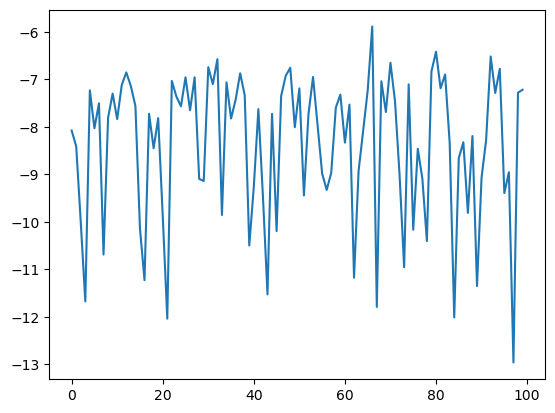

In [2]:
import matplotlib.pyplot as plt

plt.plot(losses[100:])
plt.show()

In [ ]:
from tqdm import tqdm
# game = Game()
# game.print()
# while not game.end_game:
#     s = game.get_s().to(dev)[None, None, ...]
#     p = model(s).squeeze()
#     a = torch.multinomial(p, num_samples=1).item()
#     r = game.step(0)
#     print(p)
#     game.print()

tot = 0
for i in tqdm(range(100)):
    game = Game()
    while not game.end_game:
        a = game.get_greedy_a()
        # s = game.get_s().to(dev)[None, None, ...]
        # p = model(s).squeeze()
        # a = torch.multinomial(p, num_samples=1).item()
        r = game.step(a)
    tot += game.score
print(tot / 100)

3561.28


In [ ]:
game = Game()
game.print()
while not game.end_game:
    a = int(input())
    r = game.step(0)
    print(p)
    game.print()